# Math 215 HW6 Due Friday, December 6, 2024 in Sakai

1.  Pandas exercises  (10 points)
2.  Mandelbrot set exercises  (12 points)
3.  OOP - design a Library class  (18 points)

# Problem 1 - Using pandas - 10 points

Use the starter code from November 19 to do the following:

1.1  (5 points)  Create a nicely formatted and labelled graph of the maximum temperature in three locations for the month of September, 2024.  You may use Ohare, Midway and Northerly Island, or you may choose your own weather stations to work with.


1.2  (5 points)  Fix on weather station to work with.  Compute the AVERAGE temperature for the month of October for each of the years from 2001 to 2024 and create a nicely formatted and labelled graph with the years on the horizontal axis and that year's average temperature for October on the y-axis.

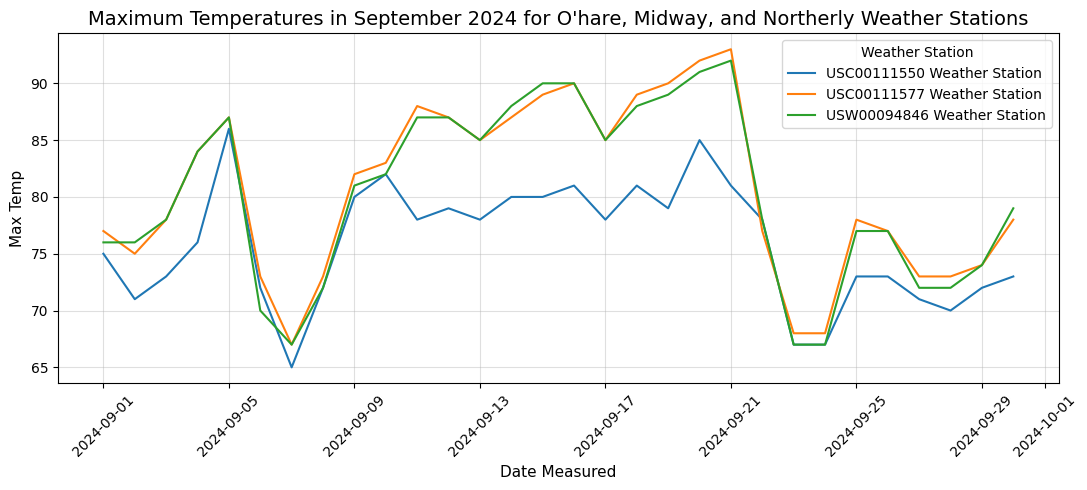

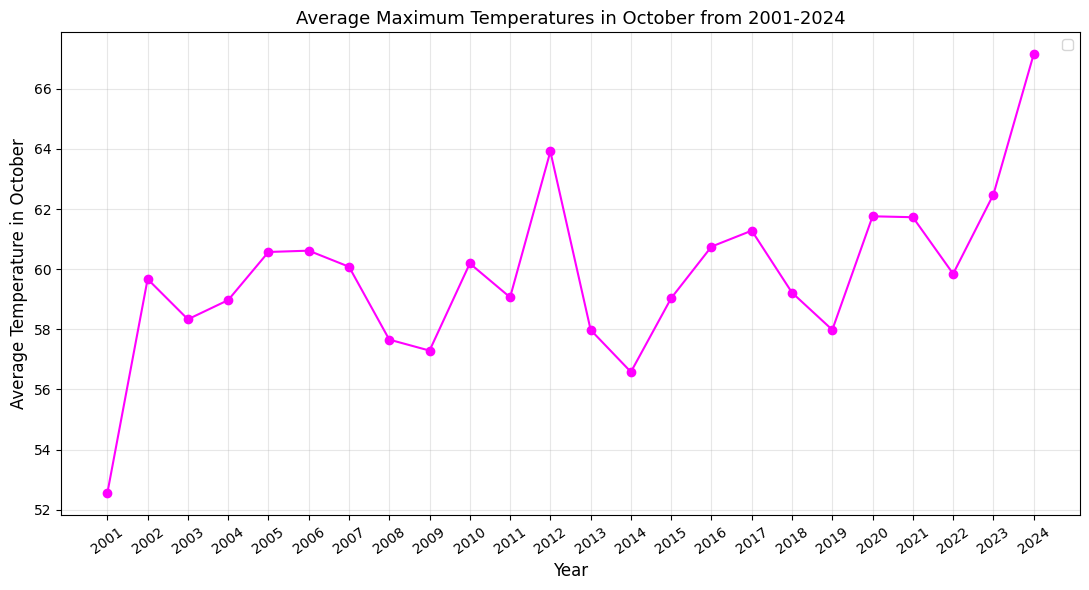

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

ohare_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1?'
    'dataset=daily-summaries'
    '&dataTypes=TMAX'
    '&stations=USW00094846'
    '&startDate=2024-09-01'
    '&endDate=2024-09-30'
    '&units=standard'
)

northerly_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1?'
    'dataset=daily-summaries'
    '&dataTypes=TMAX'
    '&stations=USC00111550'
    '&startDate=2024-09-01'
    '&endDate=2024-09-30'
    '&units=standard'
)

midway_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1?'
    'dataset=daily-summaries'
    '&dataTypes=TMAX'
    '&stations=USC00111577'
    '&startDate=2024-09-01'
    '&endDate=2024-09-30'
    '&units=standard'
)

midway_df = pd.read_csv(midway_url, parse_dates = True, index_col = 'DATE').reset_index()
# need to apply reset index arg to ensure date colum can be used as index
ohare_df = pd.read_csv(ohare_url, parse_dates = True, index_col = 'DATE').reset_index()
northerly_df = pd.read_csv(northerly_url, parse_dates = True, index_col = 'DATE').reset_index()

combined_df = pd.concat([ohare_df, northerly_df, midway_df], ignore_index=True)
# combine three dfs together, will be able to plot all at once

plt.figure(figsize=(11, 5))

for station_code, group in combined_df.groupby("STATION"):
  plt.plot(group["DATE"], group["TMAX"], label=f"{station_code} Weather Station")

plt.title("Maximum Temperatures in September 2024 for O'hare, Midway, and Northerly Weather Stations", fontsize=14)
plt.xlabel("Date Measured", fontsize=11)
plt.ylabel("Max Temp", fontsize=11)
plt.legend(title="Weather Station")
plt.grid(alpha=0.4)
plt.xticks(rotation=45) # formatting x-ticks for readability
plt.tight_layout()
plt.show()

ohare_oct_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1?'
    'dataset=daily-summaries'
    '&dataTypes=TMAX'
    '&stations=USW00094846'
    '&startDate=2001-10-01'
    '&endDate=2024-10-31'
    '&units=standard'
)

ohare_oct_temps = pd.read_csv(ohare_oct_url, parse_dates = True, index_col = 'DATE').reset_index()
ohare_oct_temps['YEAR'] = pd.to_datetime(ohare_oct_temps['DATE']).dt.year
# creating new col (YEAR) to organize based on , to_datetime function given in class
# datetime func goes thru string, converts to datetime (dt) object specifically containing year attrib

oct_avg_max_temps = ohare_oct_temps.groupby('YEAR')['TMAX'].mean().reset_index()
# groups by new year col and max temp values and takes mean of each separate category based on year

plt.figure(figsize=(11, 6))
plt.plot(oct_avg_max_temps['YEAR'], oct_avg_max_temps['TMAX'], marker='o', linestyle='-', color='magenta')
# year as x-arg and avgs as y-arg

plt.title('Average Maximum Temperatures in October from 2001-2024', fontsize=13)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature in October', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(oct_avg_max_temps['YEAR'], rotation=35) # xtick rotation formatting for readability
plt.legend(loc='best') # finds optimal place based on plotting of graph and available space
plt.tight_layout()
plt.show()

# Problem 2 - Mandelbrot Sets - 12 points

Use the starter code below from Nov 26  to generate a Mandelbrot set and the complete the variations described.  3 points for each of the problems 2.1, 2.2, 2.3, 2.4

2.1  Tickmarks, gridLines and colormaps  

Modify the given code to show x-ticks and y-ticks (corresponding to the usual x-y coordinate system.) and also  gridlines.  Then modify the color scheme to find something that you like.  You can control the color scheme by setting the colormap parameter:  For example
```
cmap=plt.cm.coolwarm
```


2.2  Control of window size and location

Modify the mandelbrot function so that you can modify the x and y ranges you are seeing in the image.  To do this you should add 4 parameters to the mandelbrot function:  xmin, xmax, ymin, ymax.  Then incorporate thise parameters into the body of the mandelbrot function replacing -2.5 by xmin, etc.  You will also need to adjust your xtick and yticks to mathc the new window.

2.3  Vary the function.  

The Mandelbrot fractal is generated by iterating the function f(z, c) = z**2 + c

If you use a different function you get different fractals.  Try these functions:  `f3(z, C) = z**3 + C,  f4(z, C) = z**4 + C`

2.4  Create a Julia set

You can read online about Julia sets  You can generate a Julia set by iterating the function f(z) = z**2 + w, where w is a fixed complex number which falls inside the Mandelbrot set.  You can search to find a good value for w.  Try this to start:  

`w = complex(-0.70176, -0.3842)`


Original Code from Numpy Documentation

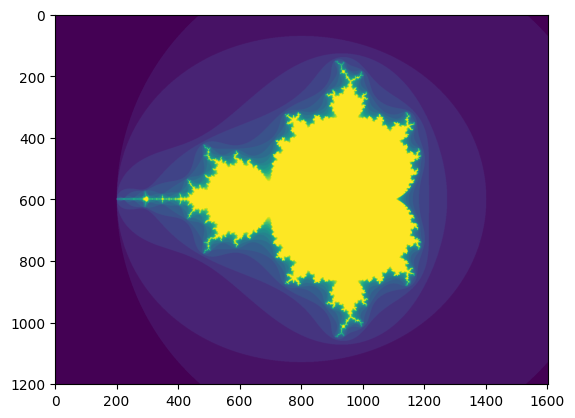

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# CHANGED CODE IS IN NEXT CELL BELOW

def mandelbrot(h, w, maxit=20, r=2):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r                    # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i                    # note when
        z[diverge] = r                          # avoid diverging too much

    return divtime
plt.clf()

plt.imshow(mandelbrot(400, 400, r = 2))

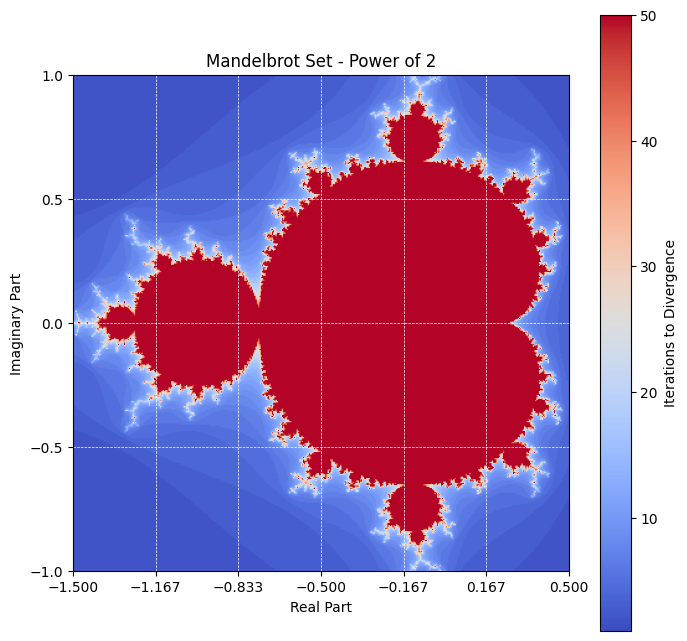

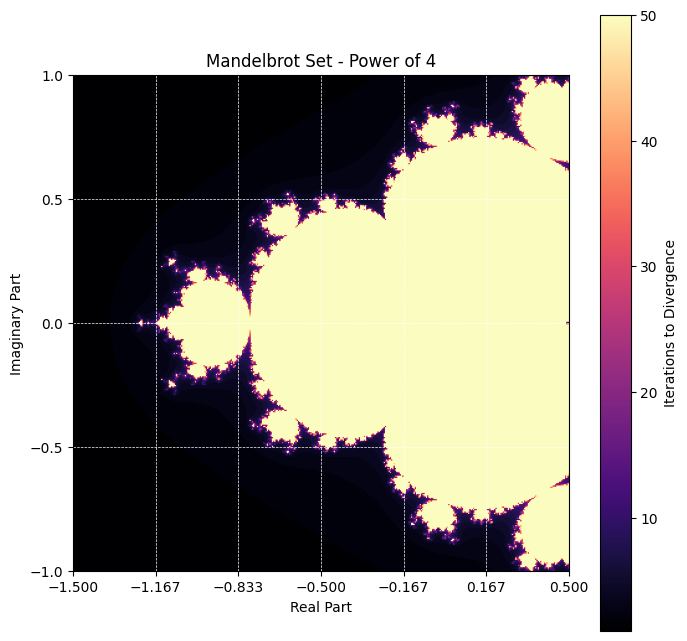

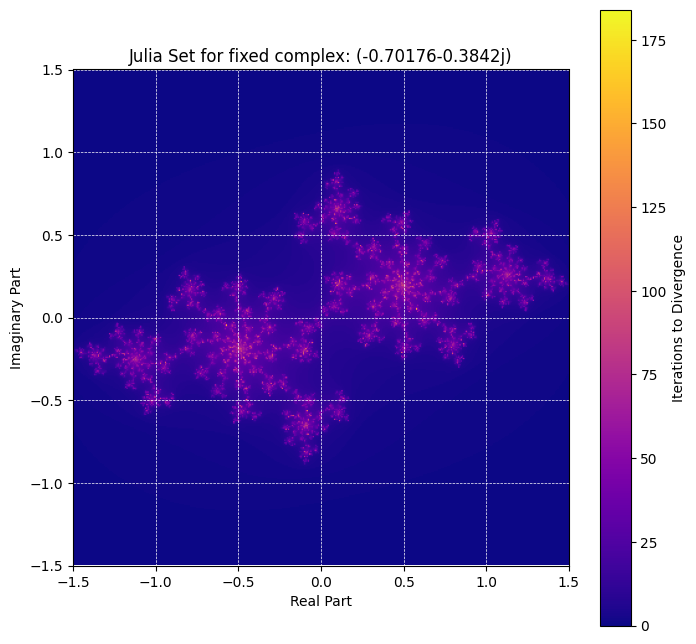

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(h, w, xmin, xmax, ymin, ymax, maxit=20, r=2, fxn_power=2):
    """Returns an image of the Mandelbrot fractal of size (h,w) within the given range."""
    x = np.linspace(xmin, xmax, w)
    y = np.linspace(ymin, ymax, h)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**fxn_power + C # changed param to param for function power for z quantity so that I could easily change it (def. val=2)
        diverge = abs(z) > r
        div_now = diverge & (divtime == maxit)
        divtime[div_now] = i
        z[diverge] = r

    return divtime

plt.figure(figsize=(8, 8))

# ranges specifically set for testing
xmin, xmax = -1.5, 0.5
ymin, ymax = -1, 1

mandelbrot_set = mandelbrot(400, 400, xmin, xmax, ymin, ymax, maxit=50, r=2, fxn_power=2)

plt.imshow(mandelbrot_set, extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.coolwarm, origin='lower')
# coolwarm colormap from matplotlib documentation
plt.colorbar(label="Iterations to Divergence")
plt.xticks(np.linspace(xmin, xmax, 7))
plt.yticks(np.linspace(ymin, ymax, 5))
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.title("Mandelbrot Set - Power of 2")
plt.show()

#####Question 2.3 below for varying the function, sorry for redundant code #####
### Scroll in output to see full pictures ###

plt.figure(figsize=(8, 8))

# custom ranges I specifically set for testing...
xmin, xmax = -1.5, 0.5
ymin, ymax = -1, 1

mandelbrot_set = mandelbrot(400, 400, xmin, xmax, ymin, ymax, maxit=50, r=2, fxn_power=4)

plt.imshow(mandelbrot_set, extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.magma, origin='lower')
# magma colormap from matplotlib documentation
# extent adapted for vaiable min and max params
plt.colorbar(label='Iterations to Divergence')
plt.xticks(np.linspace(xmin, xmax, 7)) # matches new range of min and max params
plt.yticks(np.linspace(ymin, ymax, 5))
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Mandelbrot Set - Power of 4')
plt.show()

##### Question 2.4 Create a Julia set adapted from above #####

def julia(h, w, xmin, xmax, ymin, ymax, maxit=20, r=2, c=complex(-0.70176, -0.3842)):
  # xmin xmax ymin ymax rep range for values of plane (x = real, y = range for imaginary)
    x = np.linspace(xmin, xmax, w)
    y = np.linspace(ymin, ymax, h)
    A, B = np.meshgrid(x, y)
    z = A + B * 1j # creates each separate point to plot in complex plane
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c # fixed complex c for julia sets
        diverge = abs(z) > r # current divering pt
        div_now = diverge & (divtime == maxit)
        divtime[div_now] = i
        z[diverge] = r

    return divtime

plt.figure(figsize=(8, 8)) # fig dims

# Custom ranges and params I inserted to display function varying
ymin = -1.5
ymax = 1.5

xmin = -1.5
xmax = 1.5

w = complex(-0.70176, -0.3842) # fixed parameter, other complex number versions also work

julia_set = julia(400, 400, xmin, xmax, ymin, ymax, maxit=300, r=2, c=w) # w = complex

plt.imshow(julia_set, extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.plasma, origin='lower')
# color scheme taken from matplotlib docs
plt.colorbar(label='Iterations to Divergence')
plt.title(f'Julia Set for fixed complex: {w}')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.show()


# Problem 3 - Implementing a Library class using the Author and Book classes - 18 points

For this problem you will implement a Library class making use of the Author and Book classes from Exam 2. Here I mean Library in the old-fashioned sense, as a collection of books with authors.  Do not modify the Author and Book classes - they are provided for you.  I have also written the constructor for the Library class, giving it one instance variable which is a list of books.

Implement the missing 6 functions in the Library class.  The comments specify the action of each function.

```
add_book(self, new_book)
load_from_file(self, in_filename)
def save_to_file(self, out_filename)
find_books_by(self, writer)
find_title(self, bookname)
get_oldest_book(self)

```

In [1]:
# Author and Book classes.  Do not modify these
class Author:
  def __init__(self, name = None, birth_year = -1):
    self.name = name
    self.birth_year = birth_year

  def __str__(self):
    return f'{self.name}: {self.birth_year}'

class Book:
  def __init__(self, title = None, author = None, pub_date = -1):
    self.title = title
    self.author = author
    self.pub_date = pub_date

  def __str__(self):
    return f'{self.title} by {self.author}, published {self.pub_date}'

  def __lt__(self, other):
    return self.title < other.title

# Library class.  Student work belongs in this class

class Library:
  def __init__(self):
    # Do not modify the constructor
    self.book_list = []

  def add_book(self, new_book):
    #  Add new_book to the book_list instance variable of self
    #  No return value
    self.book_list.append(new_book)

  def load_from_file(self, in_filename):
    # Open the text file named in_filename for reading
    # Read book and author information from the text file
    # Create Book and Author objects and add the books to self's instance variable book_list
    # Assume that the text file is organized with one book per line,
    # and each line contains 4 pieces of information:
    # booktitle, publication_date, author_name, author_birth_year
    # You may assume that the only commas in a line are the separators shown here.
    # If you encounter a file format error, print an error message and return

    with open(in_filename, 'r') as input_file: # reading arg = 'r'
      for given_line in input_file:
        pieces_of_info = given_line.strip().split(", ")
        if len(pieces_of_info) != 4: # assumes different format or extra/less quantities
          print("Invalid book/author formatting.")
          return
        title, pub_date, author_name, author_birth = pieces_of_info # separates pieces into sep variables
        # need to match order of initialization with format of file info

        author_birth = int(author_birth)
        pub_date = int(pub_date)

        # object creation
        author_obj = Author(author_name, author_birth)
        book_obj = Book(title, author_obj, pub_date)
        self.add_book(book_obj) # inserts book obj with author info into list attrib

  def save_to_file(self, out_filename):
    # Open the text file named out_filename for writing
    # Write the book and author information to the file in the same format as
    # specified for load_from_file above

    with open(out_filename, 'w') as file: # writing argument = 'w'
      for book_obj in self.book_list:
        file.write(f'{book_obj.title}, {book_obj.pub_date}, {book_obj.author.name}, {book_obj.author.birth_year}')

  def find_books_by(self, writer):
    # Input: a string stored in the parameter writer representing the name of a writer
    # Note that the input parameter is a string, not an Author object
    # Output:  Returns a list of the books in self written by this author.
    # If there are no books in self by this author, return an empty list.

    books_by_this_author = []
    for book in self.book_list:
      if book.author.name == writer:
        books_by_this_author.append(book) # appends entire book obj if string is equal to author name attrib
    return books_by_this_author

  def find_title(self, title):
    # Input:  a string stored in the parameter title representing the title of a book
    # Note that the input parameter is a string, not a Book object
    # Output:  Returns a list of the books in self with this title.
    # This allows for the possibility of multiple books with the same title
    # If there are no books in self by with this title, return an empty list.

    book_titles = []
    for book in self.book_list:
      if book.title == title: # increments through list attrib and compares title attrib to param
        book_titles.append(book)
    return book_titles

  def get_oldest_book(self):
    # Returns the book object in self with the earliest publication year
    # If self has no books, return None

    if not self.book_list:
      return None
    return min(self.book_list, key=lambda book: book.pub_date)
    # iterates through book list finding book with smallest pub date
    # lambda func iterates through pub-dates in list

# Testing Code for the Library Class

Expected Output:


```
Parable of the Sower by Octavia Butler: 1947, published 1993
Kindred by Octavia Butler: 1947, published 1979
There Are Rivers in the Sky by Elif Shafak: 1971, published 2024
All About Love by bell hooks: 1971, published 2001
Creation Lake by Rachel Kushner: 1968, published 2024
Done with saving the file booklist2.txt
We have 2 books by Octavia Butler
  Parable of the Sower, 1993
  Kindred, 1979
We have 0 books by butler
We have 1 book(s) with the title Kindred
  Kindred by Octavia Butler: 1947, published 1979
We have 0 book(s) with the title Holiday Recipes
The book with the earliest publication date is: Kindred by Octavia Butler: 1947, published 1979
The book with the earliest publication date is: None
```



In [3]:
lib = Library()
lib.load_from_file('booklist.txt')
for b in lib.book_list:
  print(b)
outfilename = 'booklist2.txt'
lib.save_to_file(outfilename)
print(f'Done with saving the file {outfilename}')

writer1 = 'Octavia Butler'
w_list = lib.find_books_by(writer1)
print(f'We have {len(w_list)} books by {writer1}')
for b in w_list:
  print(f'  {b.title}, {b.pub_date}')
writer2 = 'butler'
w_list = lib.find_books_by(writer2)
print(f'We have {len(w_list)} books by {writer2}')
for b in w_list:
  print(f'  {b.title}, {b.pub_date}')

book_name = 'Kindred'
b_list = lib.find_title(book_name)
print(f'We have {len(b_list)} book(s) with the title {book_name}')
for b in b_list:
  print(f'  {b}')

book_name = 'Holiday Recipes'
b_list = lib.find_title(book_name)
print(f'We have {len(b_list)} book(s) with the title {book_name}')
for b in b_list:
  print(f'  {b}')

print(f'The book with the earliest publication date is: {lib.get_oldest_book()}')
new_lib = Library()
print(f'The book with the earliest publication date is: {new_lib.get_oldest_book()}')

Parable of the Sower by Octavia Butler: 1947, published 1993
Kindred by Octavia Butler: 1947, published 1979
There Are Rivers in the Sky by Elif Shafak: 1971, published 2024
All About Love by bell hooks: 1971, published 2001
Creation Lake by Rachel Kushner: 1968, published 2024
Done with saving the file booklist2.txt
We have 2 books by Octavia Butler
  Parable of the Sower, 1993
  Kindred, 1979
We have 0 books by butler
We have 1 book(s) with the title Kindred
  Kindred by Octavia Butler: 1947, published 1979
We have 0 book(s) with the title Holiday Recipes
The book with the earliest publication date is: Kindred by Octavia Butler: 1947, published 1979
The book with the earliest publication date is: None
